In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Building the circuit

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [3]:
#default, each qubit in the register is initialized to |0⟩

#### Goal:  
Build the GHZ state: |𝜓⟩=(|000⟩+|111⟩)/‾√2.

For that we need to apply the following gates: 

- A Hadamard gate 𝐻 on qubit 0, which puts it into the superposition state (|0⟩+|1⟩)/2‾√. 

- A controlled-Not operation (𝐶𝑋) between qubit 0 and qubit 1.

- A controlled-Not operation between qubit 0 and qubit 2.

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

### Visualizing the Circuit

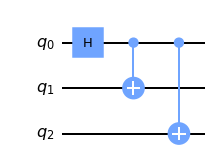

In [4]:
circ.draw('mpl')

#### OBS: 
When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. 

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as |100⟩, whereas many physics textbooks would represent it as |001⟩.

# Simulating circuits

Qiskit Aer: package for simulating quantum circuits.

## Statevector backend

statevector_simulator: returns the quantum state, which is a complex vector of dimensions 2𝑛, where 𝑛 is the number of qubits 

In [7]:
# Import Aer
from qiskit import Aer
from qiskit import execute

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

execute: to compile and run the quantum circuit. Returns a job object that encapsulates information about the job submitted to the backend

In [8]:
# Create a Quantum Program for execution
job = execute(circ, backend)

In [9]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [13]:
result = job.result() #results object contains the data 

result.get_statevector(circ): to return the state vector for the quantum circuit.


In [14]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


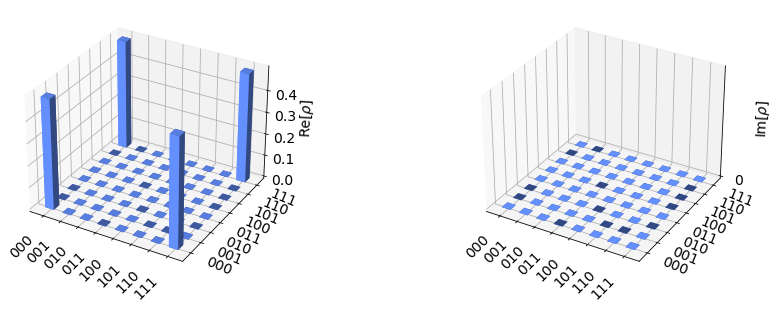

In [15]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## Unitary backend

Qiskit Aer also includes a unitary_simulator that works provided all the elements in the circuit are unitary operations. This backend calculates the 2𝑛×2𝑛 matrix representing the gates in the quantum circuit.

In [17]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

output = result.get_unitary(circ, decimals=3)
# Show the results
print(output)

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


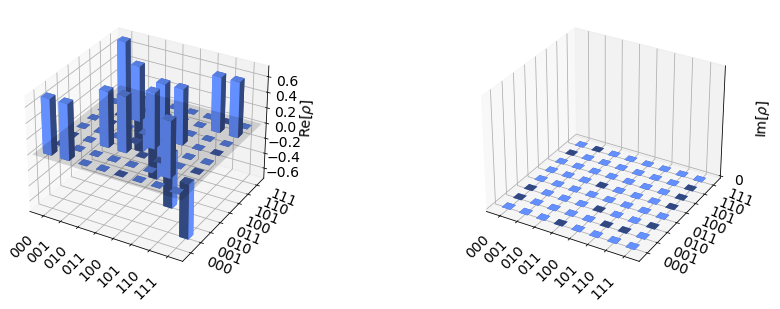

In [18]:
plot_state_city(output)

## OpenQASM backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by measuring each qubit (usually in the computational |0⟩,|1⟩ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits.

Recall the probability of obtaining outcome 𝑥𝑦𝑧 is given by

Pr(𝑥𝑦𝑧)=|⟨𝑥𝑦𝑧|𝜓⟩|^2

and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

==> To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.



In [19]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ + meas

#drawing the circuit
qc.draw()

<ipython-input-19-950c37daeeb6>:9: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = circ + meas
/opt/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits.

To simulate this circuit, we use the qasm_simulator in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate Pr(000)), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the execute function, via the shots keyword.

In [46]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

get_counts(circuit):  gives you the aggregated binary outcomes of the circuit you submitted.

In [47]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 507, '111': 517}


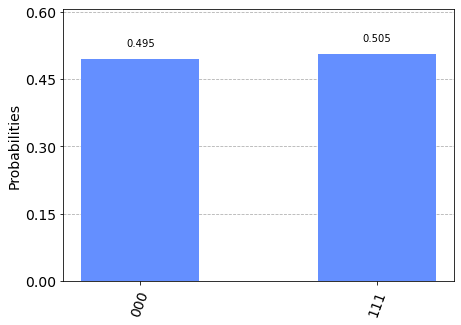

In [48]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

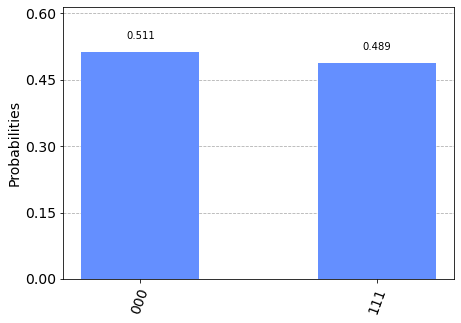

In [50]:
#Trying with different shots to compare:
job_sim2 = execute(qc, backend_sim, shots=3000)

# Grab the results from the job.
result_sim2 = job_sim2.result()

counts2 = result_sim2.get_counts(qc)
plot_histogram(counts2)